In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

1. Top Paying Data Analyst Jobs
- What are the top-paying data analyst jobs?

C:\Users\micham16\AppData\Local\Temp\ipykernel_28548\3175870711.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


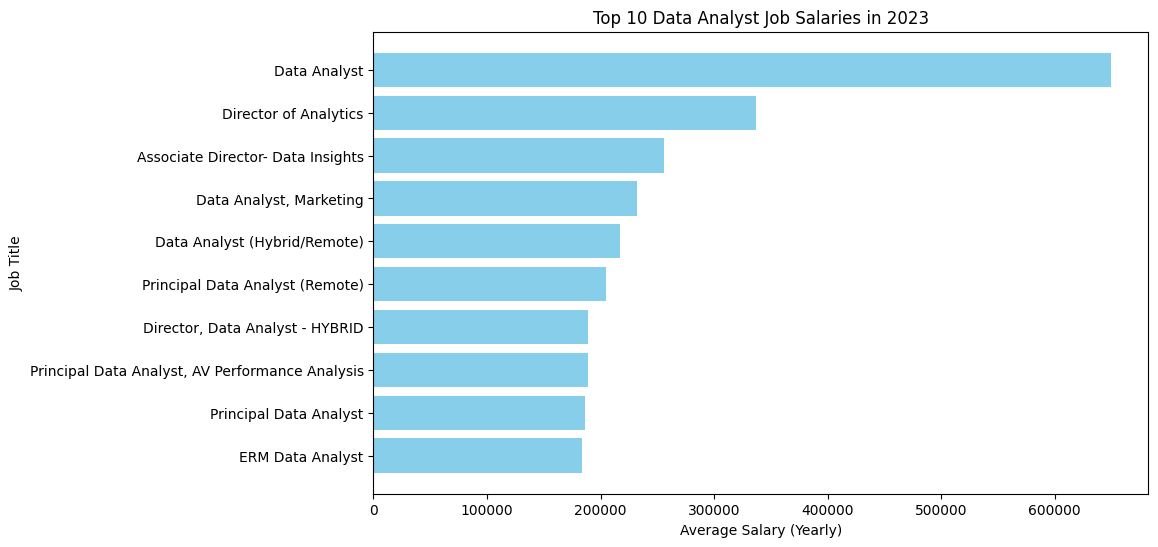

In [4]:
# Define your database connection parameters
conn_params = {
    'dbname': 'sql_course',
    'user': 'postgres',
    'password': 'Listopad2024@',
    'host': 'localhost',
    'port': '5432'
}

# Connect to your PostgreSQL database
conn = psycopg2.connect(**conn_params)

# Execute the SQL query
query = """
SELECT	
    job_id,
    job_title,
    job_location,
    job_schedule_type,
    salary_year_avg,
    job_posted_date,
    name AS company_name
FROM
    job_postings_fact
LEFT JOIN company_dim ON job_postings_fact.company_id = company_dim.company_id
WHERE
    job_title_short = 'Data Analyst' AND 
    job_location = 'Anywhere' AND 
    salary_year_avg IS NOT NULL
ORDER BY
    salary_year_avg DESC
LIMIT 10;
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(df['job_title'], df['salary_year_avg'], color='skyblue')
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Job Title')
plt.title('Top 10 Data Analyst Job Salaries in 2023')
plt.gca().invert_yaxis()  # Highest salary at the top
plt.show()

2. Skills for Top Paying Jobs
- What skills are required for these top-paying jobs?

C:\Users\micham16\AppData\Local\Temp\ipykernel_28548\133194902.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


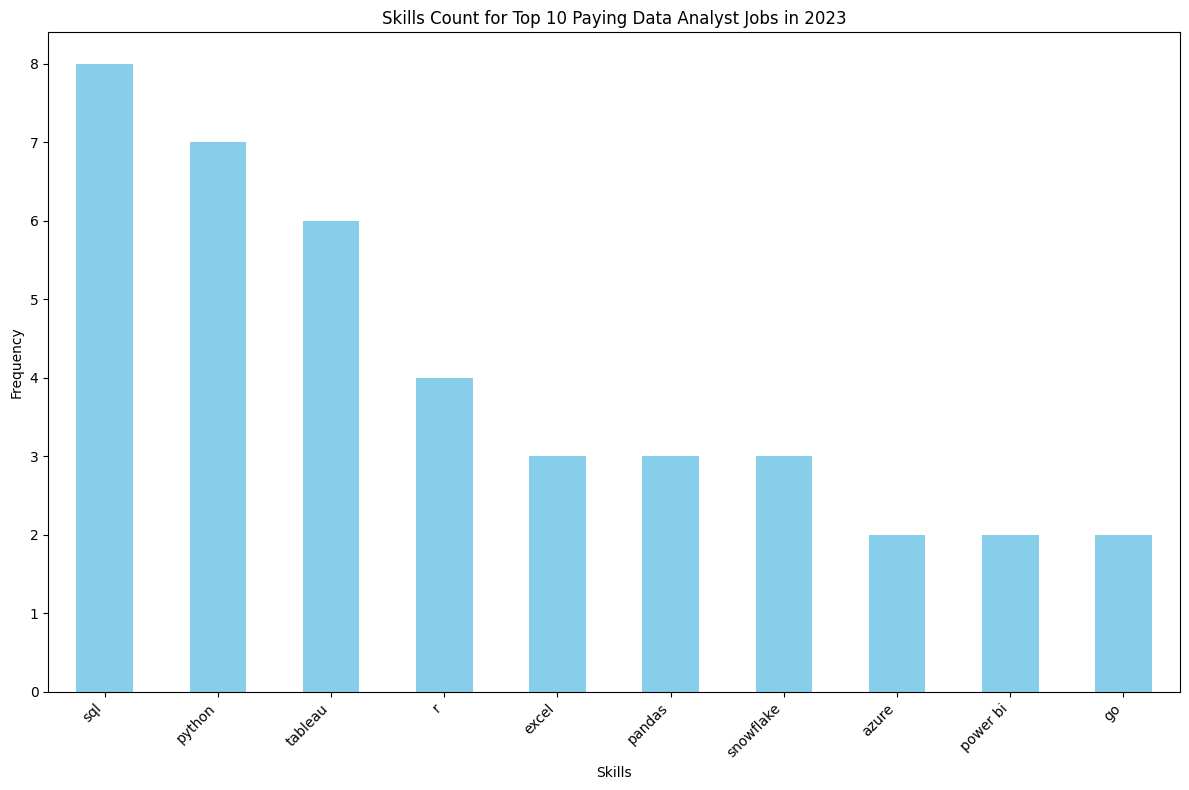

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

# Define your database connection parameters
conn_params = {
    'dbname': 'sql_course',
    'user': 'postgres',
    'password': 'Listopad2024@',
    'host': 'localhost',
    'port': '5432'
}

# Connect to your PostgreSQL database
conn = psycopg2.connect(**conn_params)

# Execute the SQL query
query = """
WITH top_paying_jobs AS (
    SELECT
        job_id,
        job_title,
        salary_year_avg,
        name AS company_name
    FROM
        job_postings_fact
    LEFT JOIN company_dim ON job_postings_fact.company_id = company_dim.company_id
    WHERE
        job_title_short = 'Data Analyst' AND
        job_location = 'Anywhere' AND
        salary_year_avg IS NOT NULL
    ORDER BY
        salary_year_avg DESC
    LIMIT 10
)
SELECT 
    top_paying_jobs.*, 
    skills 
FROM top_paying_jobs 
INNER JOIN skills_job_dim ON top_paying_jobs.job_id = skills_job_dim.job_id 
INNER JOIN skills_dim ON skills_job_dim.skill_id = skills_dim.skill_id 
ORDER BY salary_year_avg DESC;
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Count the occurrences of each skill
skill_counts = df['skills'].value_counts().head(10)
skill_counts

# Plot the data
plt.figure(figsize=(12, 8))
skill_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Skills Count for Top 10 Paying Data Analyst Jobs in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. In-Demand Skills for Data Analysts
- What skills are most in demand for data analysts?

C:\Users\micham16\AppData\Local\Temp\ipykernel_28548\3135485080.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


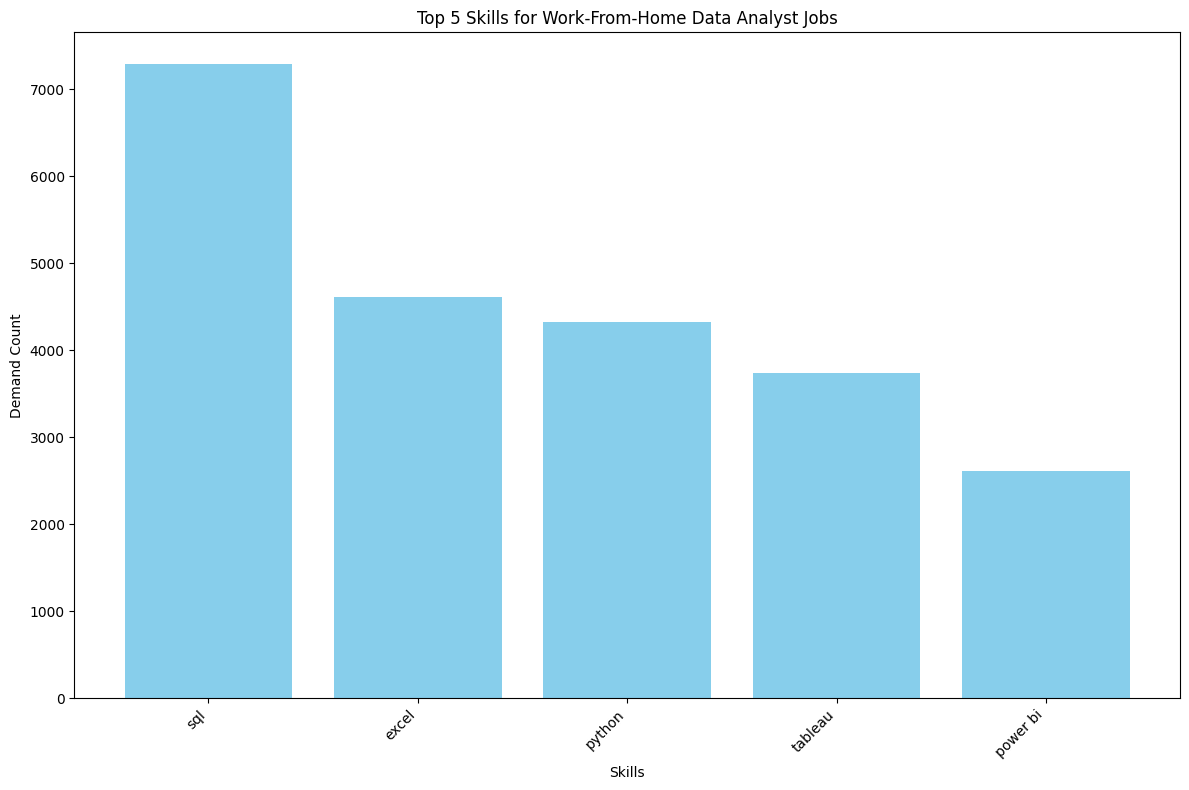

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

# Define your database connection parameters
conn_params = {
    'dbname': 'sql_course',
    'user': 'postgres',
    'password': 'Listopad2024@',
    'host': 'localhost',
    'port': '5432'
}

# Connect to your PostgreSQL database
conn = psycopg2.connect(**conn_params)

# Execute the SQL query
query = """
SELECT 
    skills,
    COUNT(skills_job_dim.job_id) AS demand_count
FROM job_postings_fact
INNER JOIN skills_job_dim ON job_postings_fact.job_id = skills_job_dim.job_id
INNER JOIN skills_dim ON skills_job_dim.skill_id = skills_dim.skill_id
WHERE
    job_title_short = 'Data Analyst'
    AND job_work_from_home = True
GROUP BY
    skills
ORDER BY
    demand_count DESC
LIMIT 5;
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(df['skills'], df['demand_count'], color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Demand Count')
plt.title('Top 5 Skills for Work-From-Home Data Analyst Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Skills Based on Salary
- Which skills are associated with higher salaries?

C:\Users\micham16\AppData\Local\Temp\ipykernel_28548\335766752.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


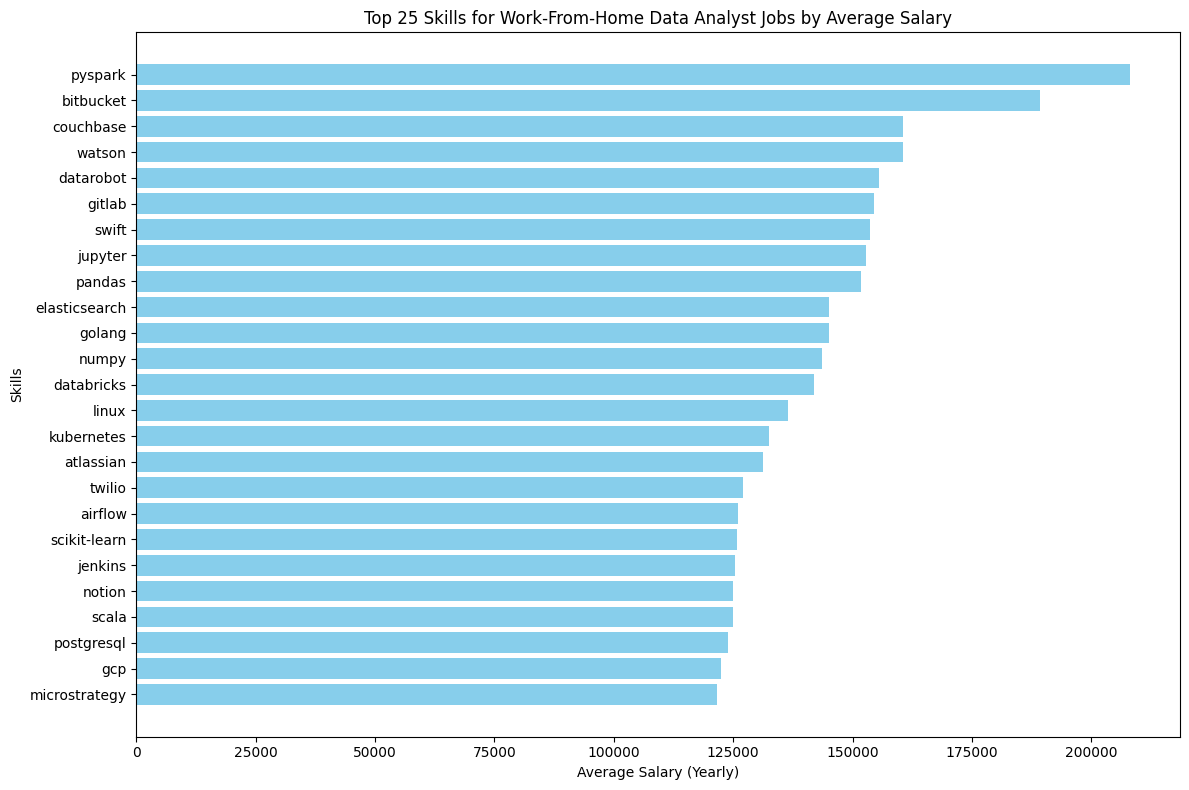

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

# Define your database connection parameters
conn_params = {
    'dbname': 'sql_course',
    'user': 'postgres',
    'password': 'Listopad2024@',
    'host': 'localhost',
    'port': '5432'
}

# Connect to your PostgreSQL database
conn = psycopg2.connect(**conn_params)

# Execute the SQL query
query = """
SELECT 
    skills,
    ROUND(AVG(salary_year_avg), 0) AS avg_salary
FROM job_postings_fact
INNER JOIN skills_job_dim ON job_postings_fact.job_id = skills_job_dim.job_id
INNER JOIN skills_dim ON skills_job_dim.skill_id = skills_dim.skill_id
WHERE
    job_title_short = 'Data Analyst' 
    AND salary_year_avg IS NOT NULL
    AND job_work_from_home = True
GROUP BY 
    skills
ORDER BY
    avg_salary DESC
LIMIT 25;
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(df['skills'], df['avg_salary'], color='skyblue')
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Skills')
plt.title('Top 25 Skills for Work-From-Home Data Analyst Jobs by Average Salary')
plt.gca().invert_yaxis()  # Highest salary at the top
plt.tight_layout()
plt.show()

5. Most Optimal Skills to Learn
- What are the most optimal skills to learn?

C:\Users\micham16\AppData\Local\Temp\ipykernel_28548\3981312496.py:42: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


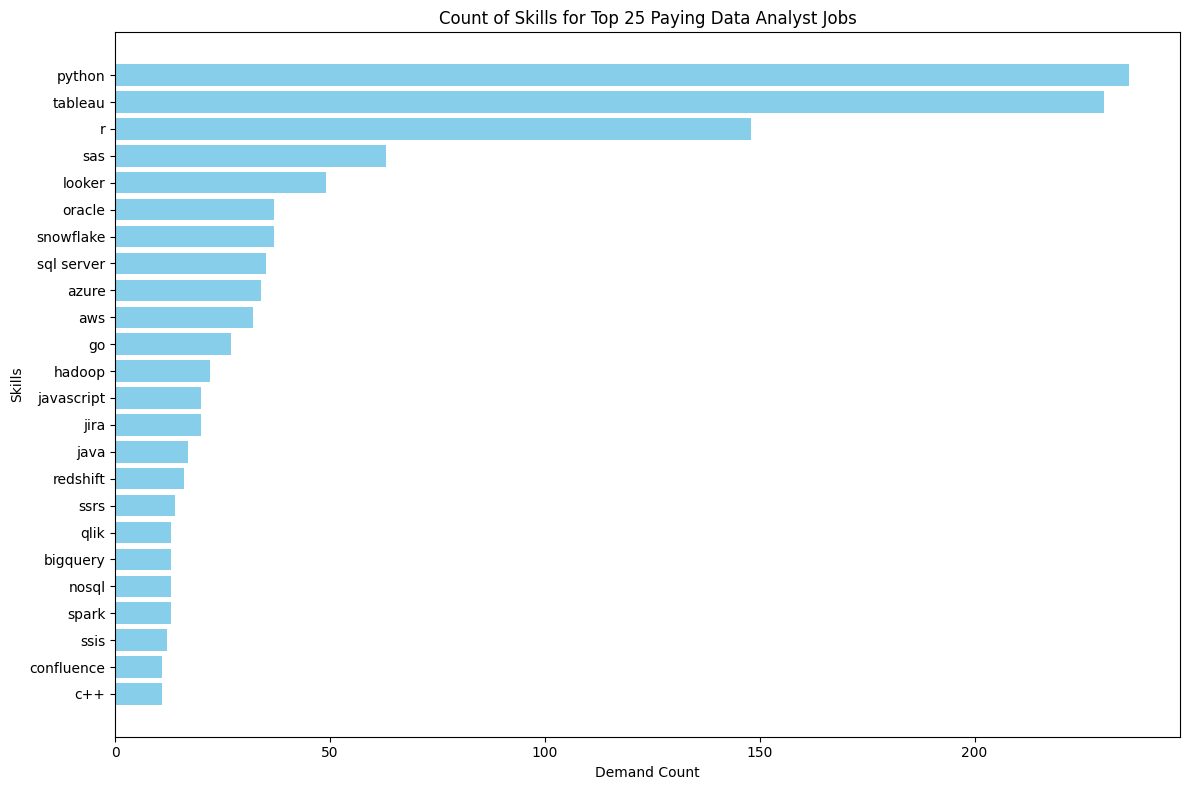

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

# Define your database connection parameters
conn_params = {
    'dbname': 'sql_course',
    'user': 'postgres',
    'password': 'Listopad2024@',
    'host': 'localhost',
    'port': '5432'
}

# Connect to your PostgreSQL database
conn = psycopg2.connect(**conn_params)

# Execute the SQL query
query = """
SELECT 
    skills_dim.skill_id,
    skills_dim.skills,
    COUNT(skills_job_dim.job_id) AS demand_count,
    ROUND(AVG(job_postings_fact.salary_year_avg), 0) AS avg_salary
FROM job_postings_fact
INNER JOIN skills_job_dim ON job_postings_fact.job_id = skills_job_dim.job_id
INNER JOIN skills_dim ON skills_job_dim.skill_id = skills_dim.skill_id
WHERE
    job_title_short = 'Data Analyst'
    AND salary_year_avg IS NOT NULL
    AND job_work_from_home = True
GROUP BY
    skills_dim.skill_id
HAVING
    COUNT(skills_job_dim.job_id) > 10
ORDER BY
    avg_salary DESC,
    demand_count DESC
LIMIT 25;
"""

# Load the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Sort the DataFrame in descending order by demand_count
df = df.sort_values(by='demand_count', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(df['skills'], df['demand_count'], color='skyblue')
plt.xlabel('Demand Count')
plt.ylabel('Skills')
plt.title('Count of Skills for Top 25 Paying Data Analyst Jobs')
plt.gca().invert_yaxis()  # Highest demand count at the top
plt.tight_layout()
plt.show()